In [46]:
import numpy as np#
import matplotlib.pyplot as plt
%precision 4

'%.4f'

In [54]:
# AMM for k = x * y
# Override mint and redeem functions for custom functionality

class Amm:

    x = 0
    y = 0
    
    x_name = ""
    y_name = ""
    z_name = ""
    
    init = False
    x_init = 0
    y_init = 0

    def __init__(self, x_name, y_name, z_name):
        self.x_name = x_name
        self.y_name = y_name
        self.z_name = z_name

    # Helper functions

    def reset(self):
        self.x = 0
        self.y = 0
        self.amm_init = dict(amm)
        self.init = False

    def zbtc_supply(self):
        return self.x + self.y

    def get_x_ratio(self):
        return self.x / (self.x + self.y)
    
    def get_x_exrate(self):
        return self.x / self.y 

    def get_k(self):
        return self.x * self.y

    def get_init_k(self):
        return self.x_init * self.y_init

    def print_amm_state(self):
        print("------------")
        print("AMM state:")
        print("{x_name}: {x}, {y_name}: {y}".format(x_name = self.x_name, x = self.x, y_name = self.y_name, y = self.y))
        print("ratio: " + str(self.get_x_ratio()))
        print("{x_name} price: {price} {y_name}".format(x_name = self.x_name, price = self.get_x_exrate(), y_name = self.y_name))
        print("k = {k}".format(k = self.get_k()))
        print("------------")


    def plot_amm(self):
        fig = plt.figure()
        xs = np.arange(1, self.x)
        ys = [self.get_k() / x for x in xs]
        plt.plot(xs, ys, "Latest")

        y_inits = [self.get_init_k() / x for x in xs]
        plt.plot(xs, y_inits, "Initial curve")
        plt.show()
        
        
    ## MINT FUNCTIONS
    """
    Mint new z LP tokens by shifting the curve as defined by x and y parameters.
    Returns: amount of z tokens minted (always x + y in this model)
    """
    def mint(self, x, y):
        self.x += x
        self.y += y
        if(self.init == False):
            self.init = True
            self.x_init = self.x
            self.y_init = self.y
        return x + y
    
    def redeem(self, z):
        x_redeem = z * self.get_x_ratio()
        y_redeem = z - x_redeem
        
        self.x -= x_redeem
        self.y -= y_redeem

        redeemed =  (x_redeem, y_redeem)
        print("Redeem: {z} {z_name} for {redeemed}".format(z = z, z_name = self.z_name, redeemed = redeemed))
        return redeemed
    
    def swap_x(self, x):
        x_new = self.x + x
        y_new = self.get_k() / x_new
        y_ret = self.y - y_new 
        slippage = (self.y - y_new) / self.y
        self.y = y_new
        self.x = x_new
        return (y_ret, slippage)
        
    """
    Swap x for y by moving along the curve.
    Returns tupple of y received in return and slippage
    """
    def swap_y(self, y):
        y_new = self.y + y
        x_new = self.get_k() / y_new
        x_ret = self.x - x_new 
        slippage = (self.x - x_new) / self.x
        self.x = x_new
        self.y = y_new
        return (x_ret, slippage)
        
        

------------
AMM state:
ibtc: 100, sbtc: 100
ratio: 0.5
ibtc price: 1.0 sbtc
k = 10000
------------
(1.9607843137254832, 0.019607843137254832)
------------
AMM state:
ibtc: 102, sbtc: 98.03921568627452
ratio: 0.5099000196039991
ibtc price: 1.0404 sbtc
k = 10000.0
------------
(3.028527071608778, 0.02969144187851743)
------------
AMM state:
ibtc: 98.97147292839122, sbtc: 101.03921568627452
ratio: 0.4948309193568476
ibtc price: 0.9795352453615277 sbtc
k = 10000.0
------------


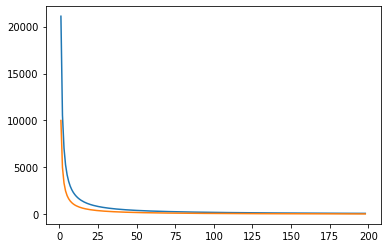

In [57]:
pamm = Amm("ibtc", "sbtc", "zbtc")

pamm.mint(100,100)
pamm.print_amm_state()

print(pamm.swap_x(2))
pamm.print_amm_state()

print(pamm.swap_y(3))
pamm.print_amm_state()

pamm.mint(100,5)
pamm.plot_amm()